# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [59]:
fitbit = pd.read_csv("../data/Fitbit2.csv")
display(fitbit.head())
print(fitbit.columns)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [180]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

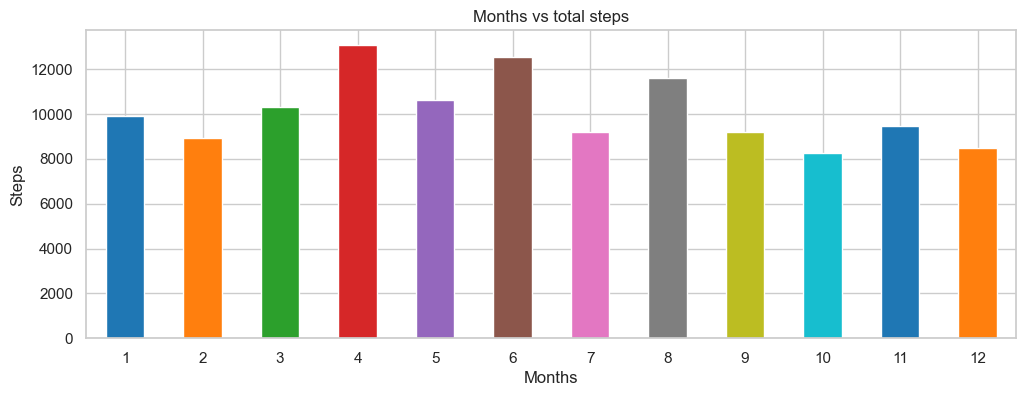

In [105]:
Months_encoded = fitbit.groupby("Months_encoded")["Steps"].mean().plot(kind = "bar", title = "Months vs total steps", figsize = (12,4), xlabel = "Months", ylabel = "Steps", color=colors)
plt.xticks(rotation=0)
plt.show()

Months_encoded.figure.savefig("../figures/Months_encoded.jpg", dpi=1000)

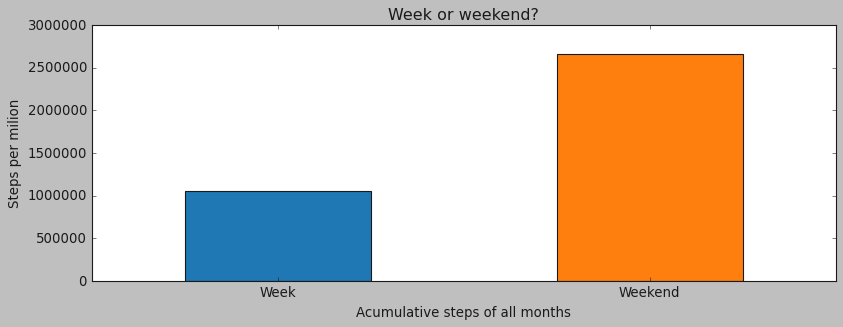

In [299]:
x_ticks = [0,1]
x_labels = ['Week', "Weekend"] 

Weekend_encoded = fitbit.groupby("Work_or_Weekend")["Steps"].sum().plot(kind = "bar", title = "Week or weekend?", figsize = (12,4), xlabel="Acumulative steps of all months", ylabel = "Steps per milion", color=colors)
plt.xticks(ticks=x_ticks, labels=x_labels, rotation = 0)
plt.show()

Weekend_encoded.figure.savefig("../figures/Weekend_encoded.jpg", dpi=1000)

In [298]:
""""Fitbit is more active on weekends"""

'"Fitbit is more active on weekends'

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

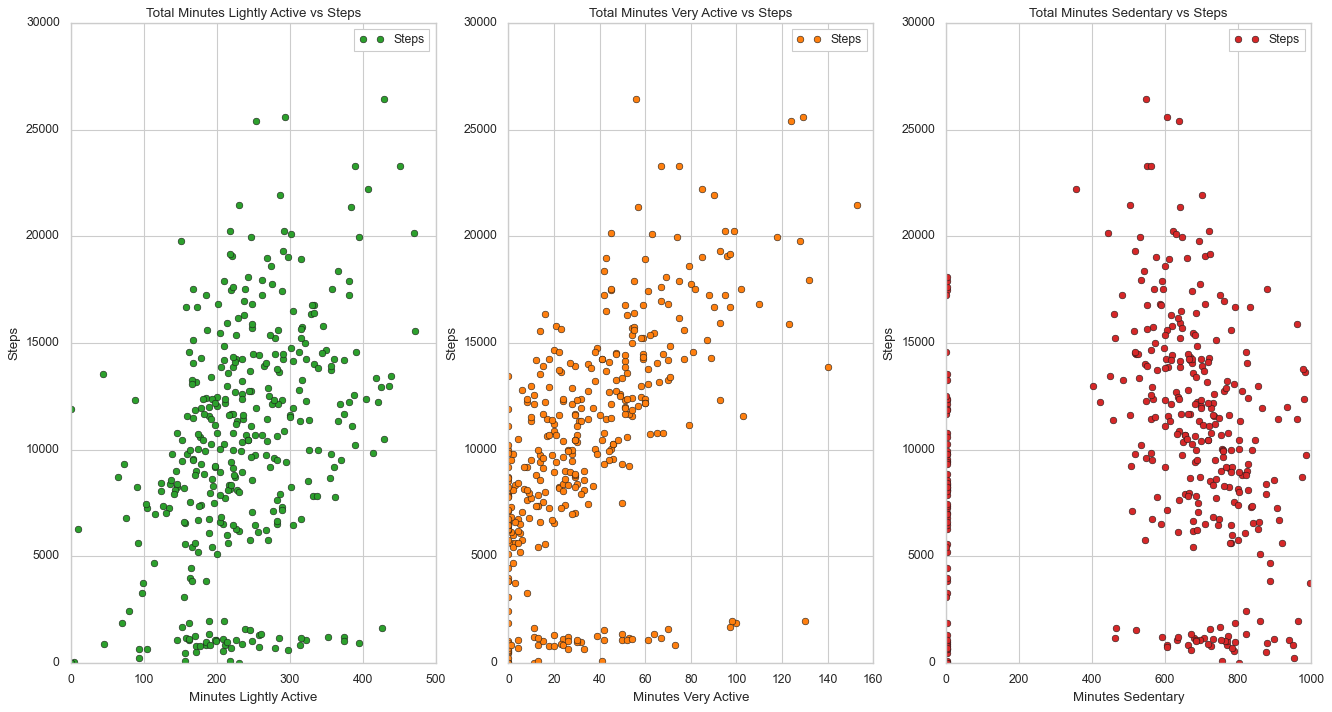

In [481]:
variables = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
counter = -1
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

for i in variables:
    
    counter+=1
    Minutes_vs_steps = fitbit.plot(x=i, y="Steps", style="o", ylabel="Steps", title=f"Total {i} vs Steps", ax=axs[counter], color = random.choice(colors))   

In [482]:
Minutes_vs_steps.figure.savefig("../figures/Minutes_vs_steps.jpg", dpi=1000)

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [4]:
titanic = pd.read_csv('../../../lectures/datasets/titanic.csv')

In [128]:
titanic.shape

(891, 11)

In [131]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Explore the titanic dataset using Pandas dtypes.

In [135]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [137]:
titanic.shape

(891, 11)

In [139]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [149]:
list(titanic.select_dtypes(["int64", "float64"]).columns)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [152]:
list(titanic.select_dtypes("object").columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [228]:
plt.style.use("classic")
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

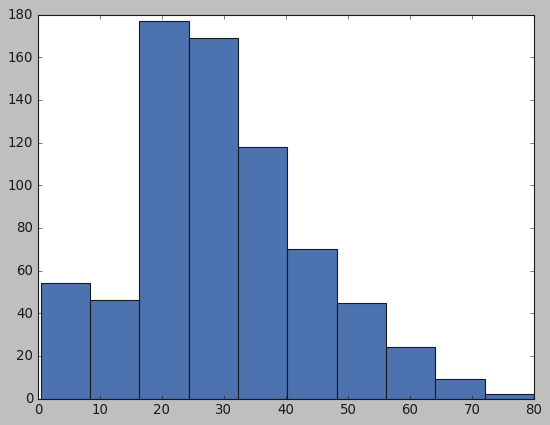

In [328]:
titanic_age = plt.hist(titanic["Age"])
plt.xlabel= "Age"
plt.ylabel= "People"
plt.title = "Age distribution"
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

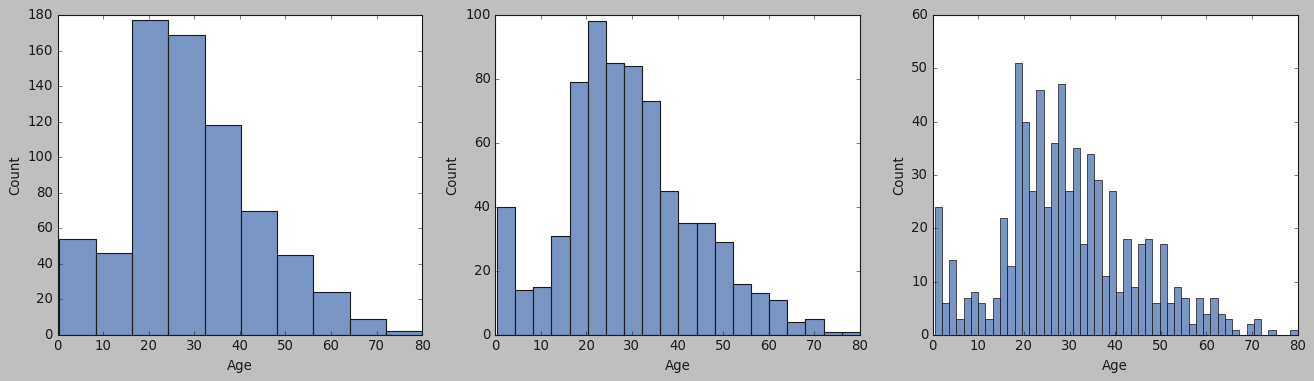

In [312]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.histplot(data=titanic, x="Age", bins= 10, ax=axs[0])
sns.histplot(data=titanic, x="Age", bins = 20, ax=axs[1])
sns.histplot(data=titanic, x="Age", bins = 50, ax=axs[2])

#### How does the bin size affect your plot?

In [297]:
"""More ranges are selected between the same axis step, i.e, more info is displayed"""

'More ranges are selected between the same axis step, i.e, more info is displayed'

#### Use seaborn to show the distribution of column `Age`.

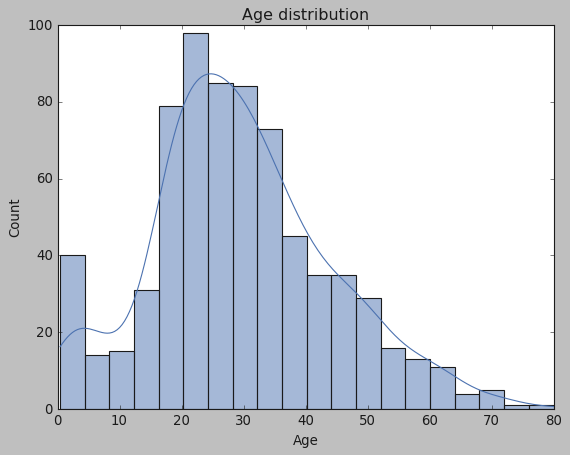

In [325]:
titanic_age2 = sns.histplot(x=titanic.Age, kde=True).set(title='Age distribution')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

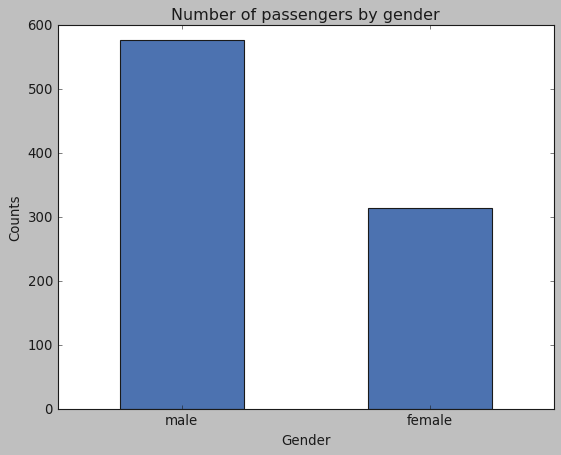

In [354]:
titanic_gender_mat = titanic["Sex"].value_counts().plot(kind = "bar", xlabel="Gender", ylabel="Counts", title="Number of passengers by gender")
plt.xticks(rotation = 0)
plt.show()

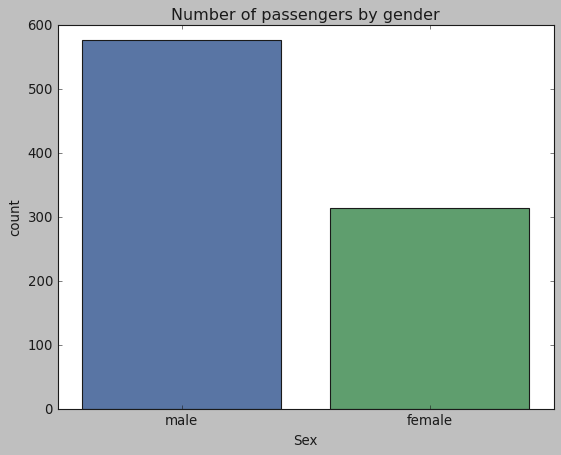

In [357]:
titanic_gender_sns = sns.countplot(x=titanic.Sex).set(title = "Number of passengers by gender")

#### Use the right plot to visualize the column `Pclass`.

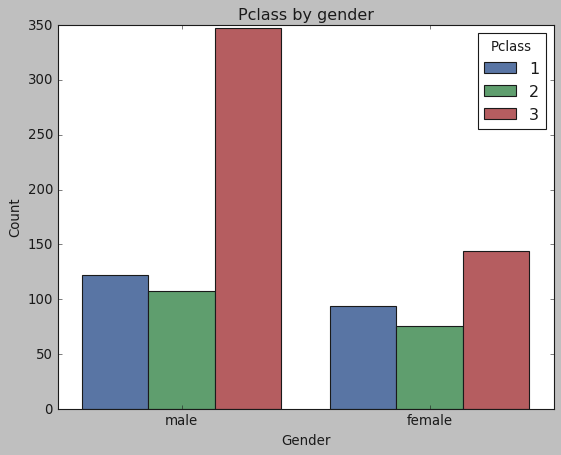

In [364]:
titanic_pclass = sns.countplot(data=titanic, x="Sex", hue="Pclass").set(xlabel = "Gender", ylabel="Count", title="Pclass by gender")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [368]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

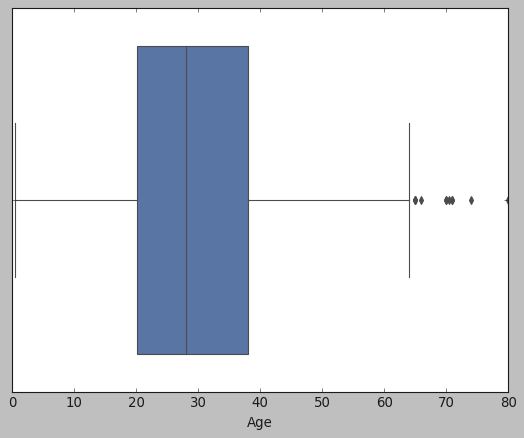

In [371]:
titanic_age_stats = sns.boxplot(data = titanic, x="Age")

In [372]:
"""
The left big vertical line shows us the minimum;
The right big vertical line shows us the maximum;
The left-side of the blue box shows us the 25% quartile;
The right-side of the blue box shows us the 75% quartile;
The line in the midle of the blue box shows us the median;
The individual points at the right side shows us the outliers
"""

'\nThe left big vertical line shows us the minimum;\nThe right big vertical line shows us the maximum;\nThe left-side of the blue box shows us the 25% quartile;\nThe right-side of the blue box shows us the 75% quartile;\nThe line in the midle of the blue box shows us the median;\nThe individual points at the right side shows us the outliers\n'

#### What does the last plot tell you about the feature `Age`?

In [373]:
"""
That the people in the ship were quite young. The cuartile 25 shows us that the passengers had 20 years old or less,
and the cuartile 75 had 38 years old or less.
"""

'\nThat the people in the ship were quite young. The cuartile 25 shows us that the passengers had 20 years old or less,\nand the cuartile 75 had 38 years old or less\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

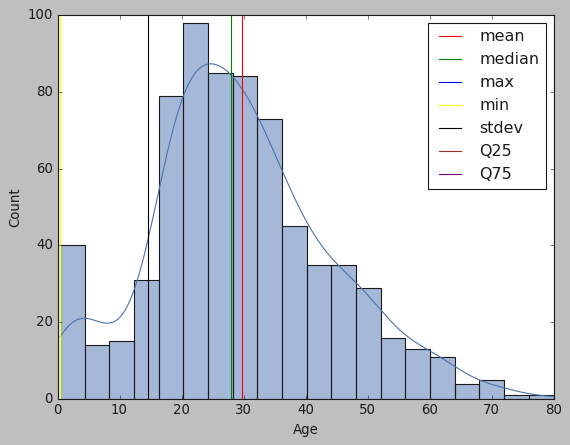

In [391]:
titanic_age_dist_stats = sns.histplot(x=titanic.Age, kde=True)

titanic_age_dist_stats.axvline(x=titanic.Age.mean(), c="red", label="mean")
titanic_age_dist_stats.axvline(x=titanic.Age.median(), c="green", label="median")
titanic_age_dist_stats.axvline(x=titanic.Age.max(), c="blue", label="max")
titanic_age_dist_stats.axvline(x=titanic.Age.min(), c="yellow", label="min")
titanic_age_dist_stats.axvline(x=titanic.Age.std(), c="black", label="stdev")
titanic_age_dist_stats.axvline(x=np.percentile(titanic.Age, 25), c="brown", label="Q25")
titanic_age_dist_stats.axvline(x=np.percentile(titanic.Age, 75), c="purple", label="Q75")


plt.legend();

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
The median is close to the maximum of the distribution
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

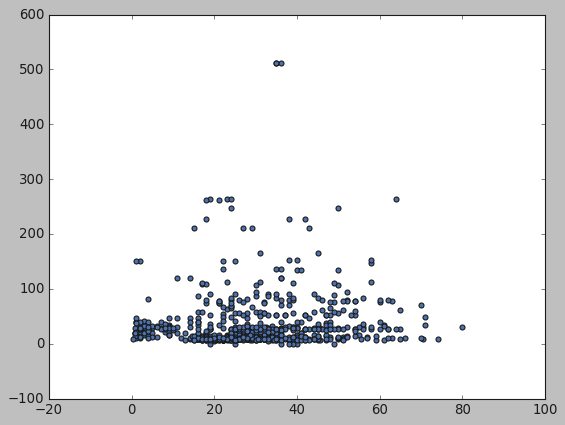

In [412]:
titanic_age_fare_mat = plt.scatter(x=titanic.Age, y=titanic.Fare)

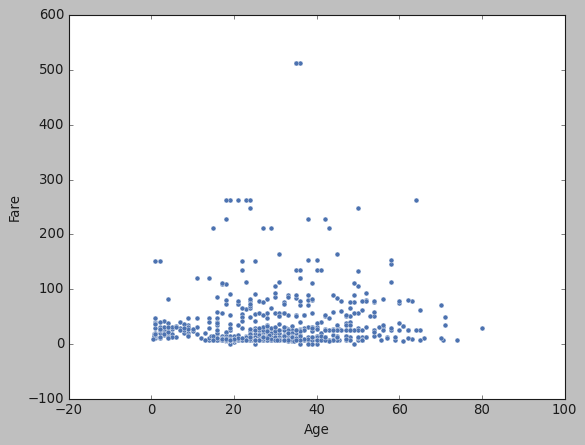

In [400]:
titanic_age_fare_sns = sns.scatterplot(data=titanic, x="Age", y="Fare")

In [442]:
"""They are not very correlated"""

'They are not very correlated'

#### Plot the correlation matrix using seaborn.

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


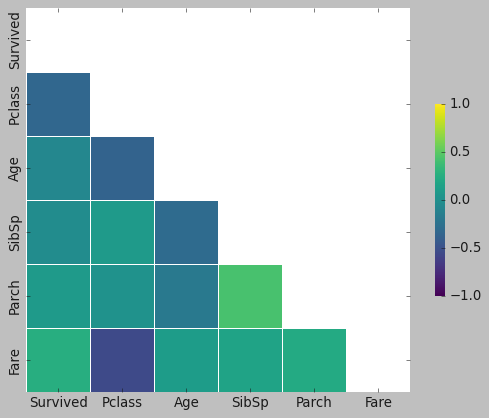

In [444]:
titanic_corr = titanic.corr()
display(titanic_corr)

mask = np.triu(np.ones_like(titanic_corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(titanic_corr,  
            mask = mask,
            cmap="viridis",
            square=True, 
            linewidth=0.5,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5}
);

#### What are the most correlated features?

In [441]:
"""Pclass with age are the most correlated"""

'Pclass with age are the most correlated'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

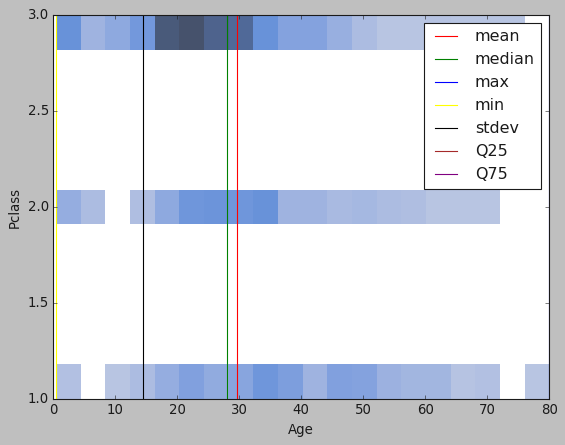

In [477]:

titanic_age_dist_stats = sns.histplot(x=titanic.Age, y= titanic.Pclass, kde=True)

titanic_age_dist_stats.axvline(x=titanic.Age.mean(), c="red", label="mean")
titanic_age_dist_stats.axvline(x=titanic.Age.median(), c="green", label="median")
titanic_age_dist_stats.axvline(x=titanic.Age.max(), c="blue", label="max")
titanic_age_dist_stats.axvline(x=titanic.Age.min(), c="yellow", label="min")
titanic_age_dist_stats.axvline(x=titanic.Age.std(), c="black", label="stdev")
titanic_age_dist_stats.axvline(x=np.percentile(titanic.Age, 25), c="brown", label="Q25")
titanic_age_dist_stats.axvline(x=np.percentile(titanic.Age, 75), c="purple", label="Q75")


plt.legend();

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

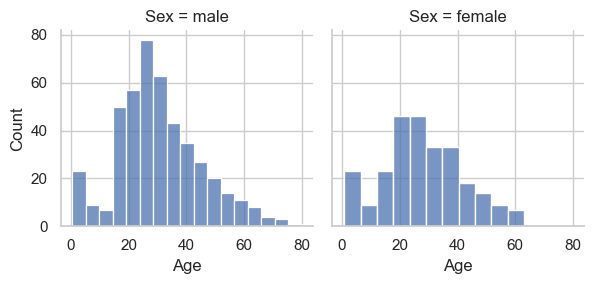

In [9]:
g = sns.FacetGrid(titanic, col="Sex")
g.map_dataframe(sns.histplot, "Age")
g.add_legend()